Iris Classification Model: Machine learning model that will allow us to classify species of iris flowers.
I will show two algorithms to determine the species of an iris flower based on the characteristic of that flower.

In [318]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn import tree
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

In [319]:
#show data
iris = load_iris()
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df['target']=pd.Series(iris.target)
df['target_names']=pd.Series(iris.target_names)
species = []
for i in range(len(df)):
    if df.iloc[i]['target'] == 0:
        species.append('setosa')
    elif df.iloc[i]['target'] == 1:
        species.append('versicolor')
    elif df.iloc[i]['target'] == 2:
        species.append('virginica')
df['Species'] = species

df

,sepal length,sepal width,petal length,petal width,target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


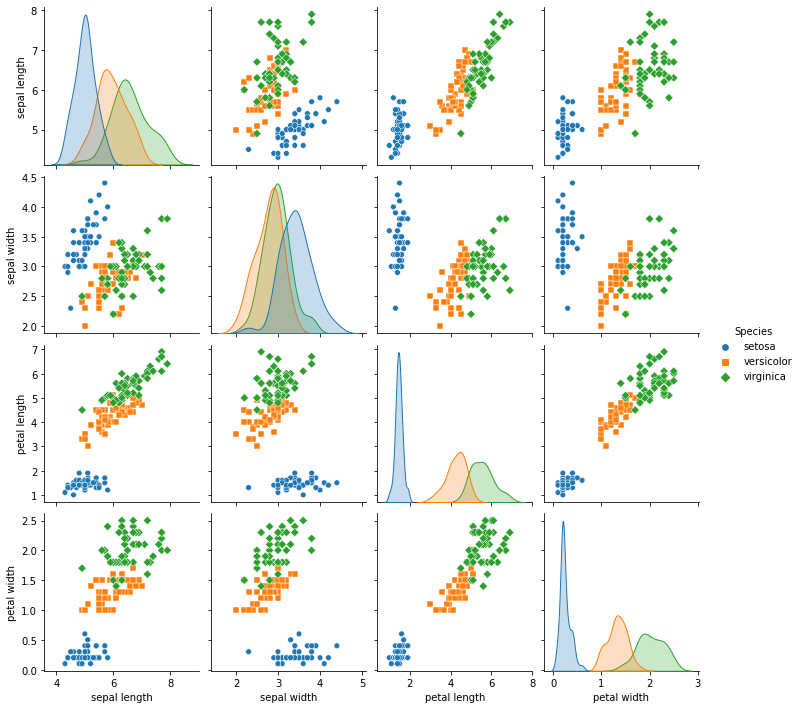

In [320]:
sns.pairplot(df.drop(['target'],axis=1),hue='Species',height=2.5,markers=["8","s","D"])
plt.show()

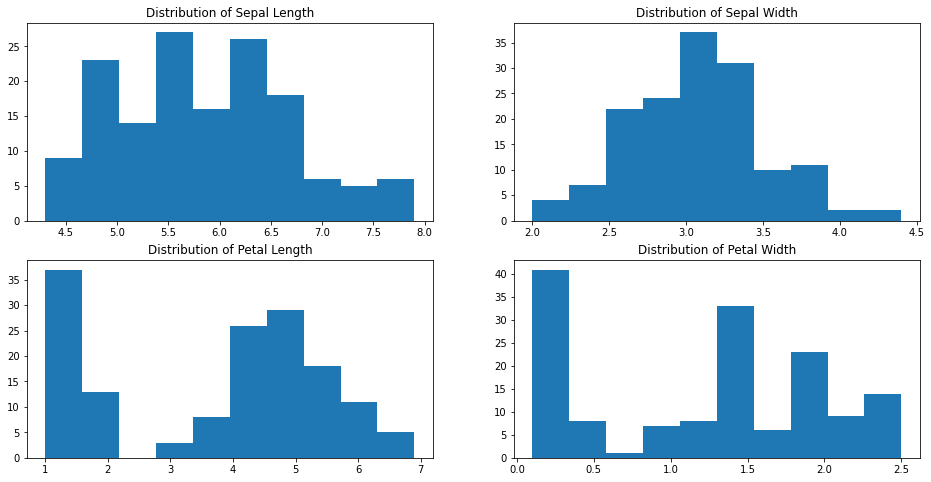

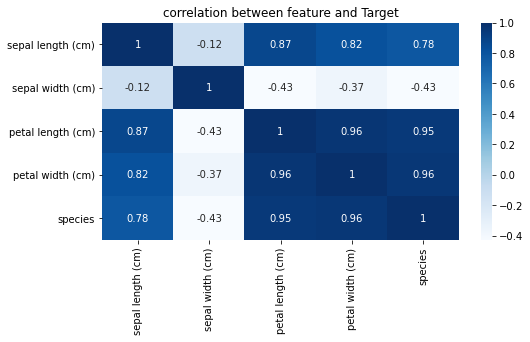

In [321]:
#distributions and correlations


iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["species"] = iris_set.target
iris_target = pd.DataFrame(iris.target, columns=["species"])

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#Analysing the distributions of sepal and petal dimensions
#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(iris_data["sepal length (cm)"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(iris_data["sepal width (cm)"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(iris_data["petal length (cm)"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(iris_data["petal width (cm)"]);

plt.figure(figsize=(8,4))
plt.title('correlation between feature and Target')
sns.heatmap(iris_data.corr(), annot=True, cmap='Blues');

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


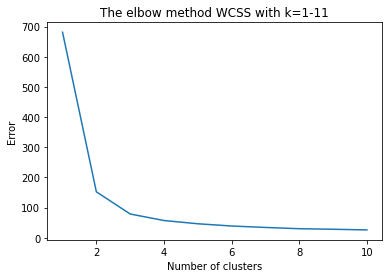

In [322]:
# Clustering IRIS Plant Data Using K-Means Clustering
# Using the elbow method to estimate the value k

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method WCSS with k=1-11')
plt.xlabel('Number of clusters')
plt.ylabel('Error') #within cluster sum of squares
plt.show()

#The output graph of the Elbow method is shown below. Note that the shape of elbow is approximately formed at k=3

In [323]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(iris.data)

Text(0.5, 1.0, 'Predicted')

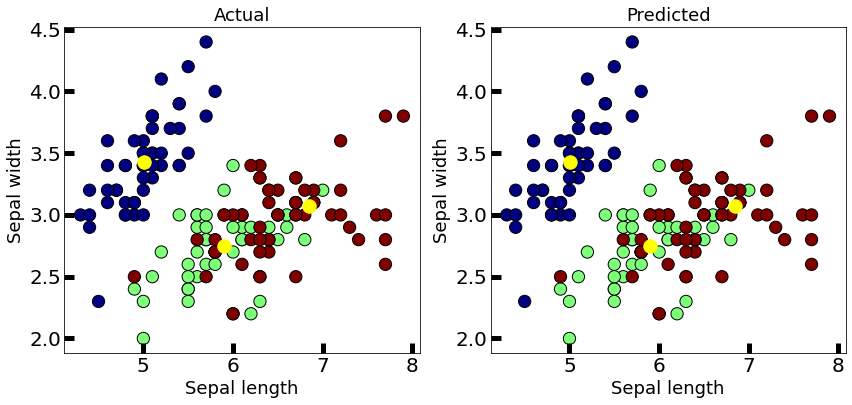

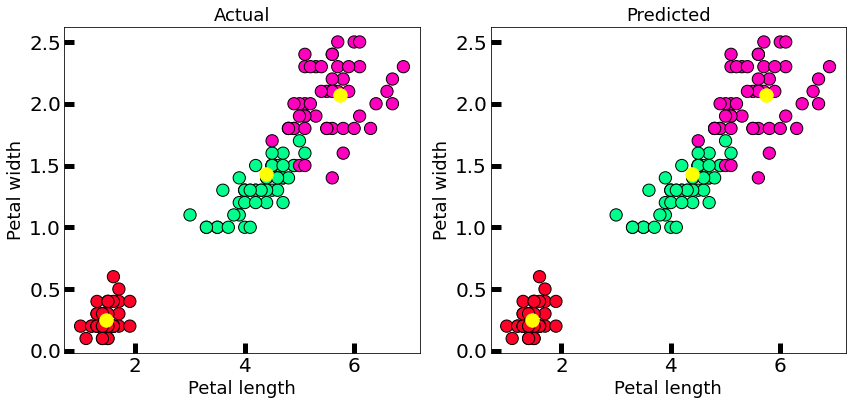

In [324]:
#Visualising the results
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='jet',edgecolor='k', s=150)
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')
axes[1].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['petal length'], y=df['petal width'], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(x=df['petal length'], y=df['petal width'], c=iris.target, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 180, c = 'yellow', label = 'Centroids')
axes[1].scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 180, c = 'yellow', label = 'Centroids')
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [325]:
#conslusions

pd.crosstab(iris.target,y_kmeans)

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [326]:
#misclassifications:
print("The accuracy of K-Means with 3 clusters is:", metrics.accuracy_score(iris.target,y_kmeans))
print("setosa = Successful prediction")
print("versicolor = 2 from 50 misclassifications (predict virginica instead versicolor)")
print("virginica = 14 from 50 misclassifications (predict versicolor instead virginica)")

The accuracy of K-Means with 3 clusters is: 0.24
setosa = Successful prediction
versicolor = 2 from 50 misclassifications (predict virginica instead versicolor)
virginica = 14 from 50 misclassifications (predict versicolor instead virginica)


In [327]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

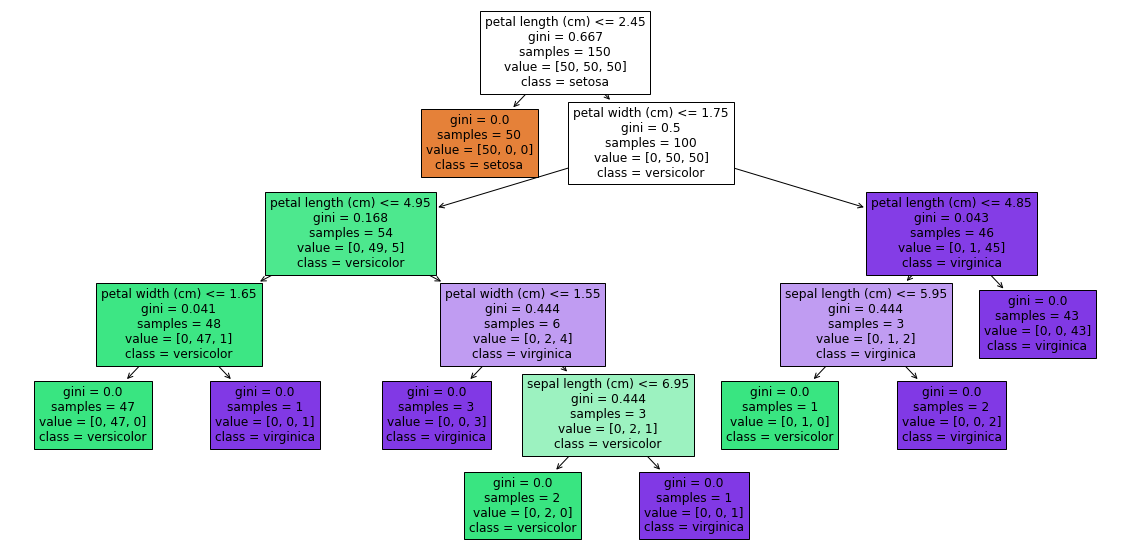

In [328]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (20,10))
tree.plot_tree(clf,feature_names = fn, class_names=cn, filled = True);
plt.show()

In [329]:
#train test split
X_trainset,X_testset,Y_trainset,Y_testset=train_test_split(iris.data,iris.target,test_size=0.3)
clf = clf.fit(X_trainset, Y_trainset)
y_pred = clf.predict(X_testset)

print("Accuracy:",metrics.accuracy_score(Y_testset, y_pred))

Accuracy: 0.9333333333333333


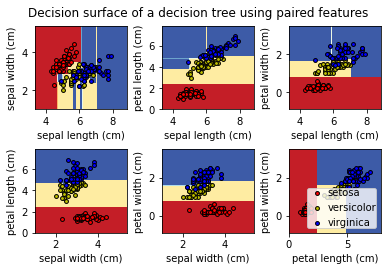

In [335]:
# Visualization DecisionTreeClassifier results

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
   
    plt.subplot(2, 3, pairidx + 1)
    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()